In [2]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:

# Read csv file into a pandas dataframe
app_df = pd.read_csv("loan/application_data.csv")

# Take a look at the first few rows
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
sum(app_df.duplicated(subset = "SK_ID_CURR")) == 0

True

In [9]:
app_df.shape

(307511, 122)

In [5]:
print (app_df.isnull().sum())  
print (app_df.isnull().values.any())
print (app_df.isnull().values.sum())

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                   202929
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
F

**checking the % of NAs columnwise**

In [25]:
app_df.isnull().sum()*100/app_df.shape[0] 

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
OWN_CAR_AGE                   65.990810
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000


In [6]:
app_df = app_df.drop(['OWN_CAR_AGE','OCCUPATION_TYPE'],axis=1)

In [4]:
app_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [7]:
#Replace all XNA with NaN
app_df = app_df.replace({'XNA': numpy.NaN})


/Users/tavant/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


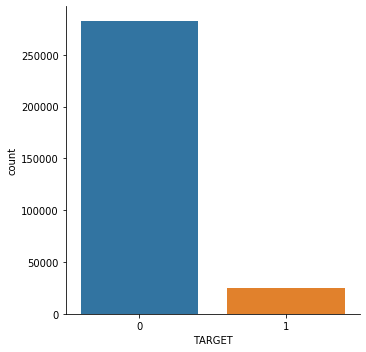

In [67]:
# Data imbalance - 0 means repayed 1 means not repayed, more data is of repayed
sns.factorplot(x = "TARGET", data = app_df, kind = "count")


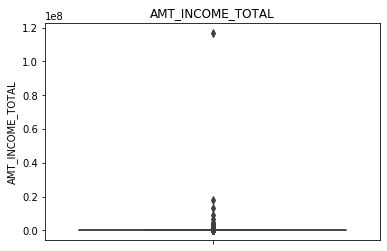

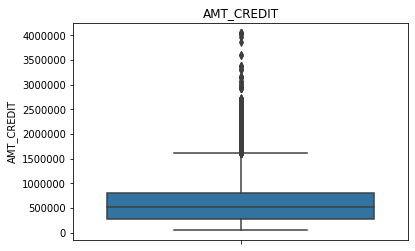

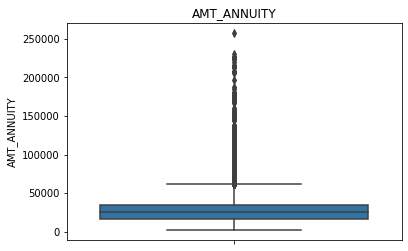

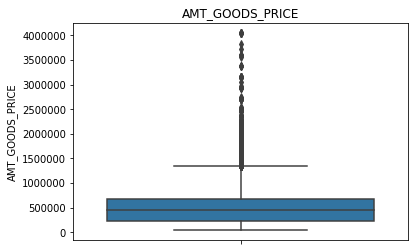

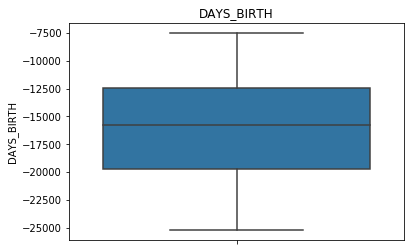

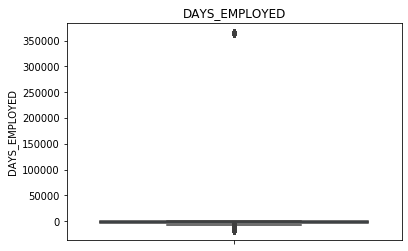

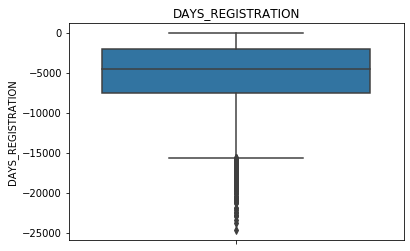

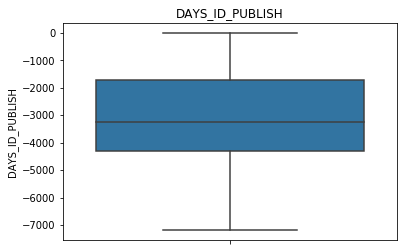

In [8]:
for col in ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']:
    sns.boxplot(app_df[col].dropna(), orient = 'v')
    plt.title(col)
    plt.show()

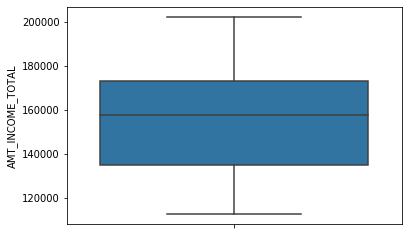

In [68]:
def remove_outlier(df, col):
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  out_df = df.loc[(df[col] > q1) & (df[col] < q3)]
  return out_df

app_df = remove_outlier(app_df,"AMT_INCOME_TOTAL")
sns.boxplot(app_df["AMT_INCOME_TOTAL"].dropna(), orient = 'v')


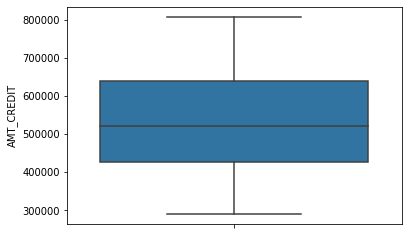

In [69]:
app_df = remove_outlier(app_df,"AMT_CREDIT")
sns.boxplot(app_df["AMT_CREDIT"].dropna(), orient = 'v')

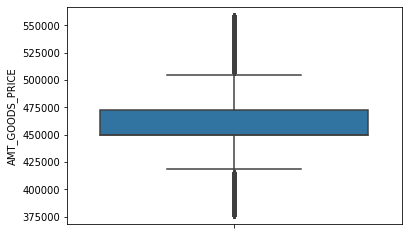

In [70]:
app_df = remove_outlier(app_df,"AMT_GOODS_PRICE")
sns.boxplot(app_df["AMT_GOODS_PRICE"].dropna(), orient = 'v')

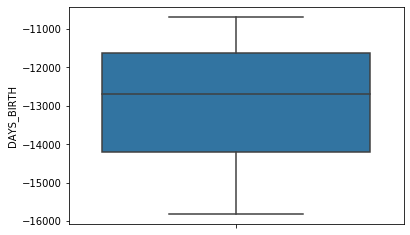

In [115]:
app_df = remove_outlier(app_df,"DAYS_BIRTH")
sns.boxplot(app_df["DAYS_BIRTH"].dropna(), orient = 'v')


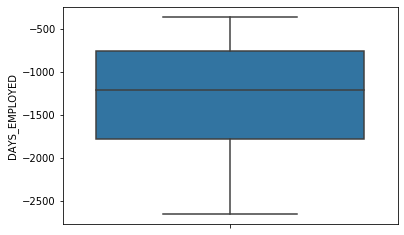

In [71]:
app_df = remove_outlier(app_df,"DAYS_EMPLOYED")
sns.boxplot(app_df["DAYS_EMPLOYED"].dropna(), orient = 'v')


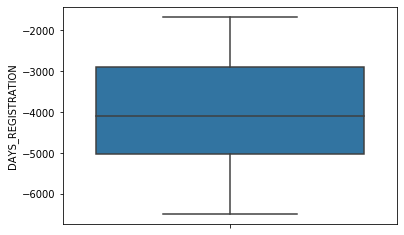

In [72]:
app_df = remove_outlier(app_df,"DAYS_REGISTRATION")
sns.boxplot(app_df["DAYS_REGISTRATION"].dropna(), orient = 'v')


/Users/tavant/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


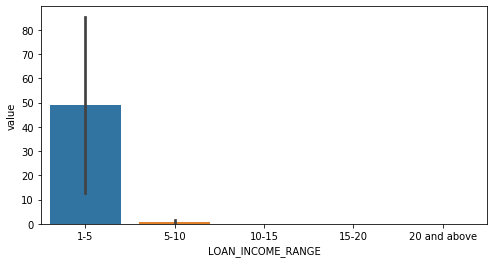

In [73]:
app_df['LOAN_INCOME_RATIO']= app_df['AMT_CREDIT']/app_df['AMT_INCOME_TOTAL']
bins = [1, 5, 10, 15, 20,50]
slot = ['1-5', '5-10', '10-15', '15-20', '20 and above']
app_df['LOAN_INCOME_RANGE'] = pd.cut(app_df['LOAN_INCOME_RATIO'], bins, labels=slot)
#sns.factorplot(x = "LOAN_INCOME_RANGE", data = app_final, kind = "count")
def percent_plot(df,feature,width=4,height=4):
    cross_target =pd.crosstab(df[feature], df['TARGET'], normalize=True) * 100
    cross_target_final = cross_target.stack().reset_index().rename(columns={0:'value'})
    plt.figure(figsize=(width,height))
    sns.barplot(x=cross_target_final[feature], y=cross_target_final.value)
percent_plot(app_df,'LOAN_INCOME_RANGE',8,4)

/Users/tavant/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


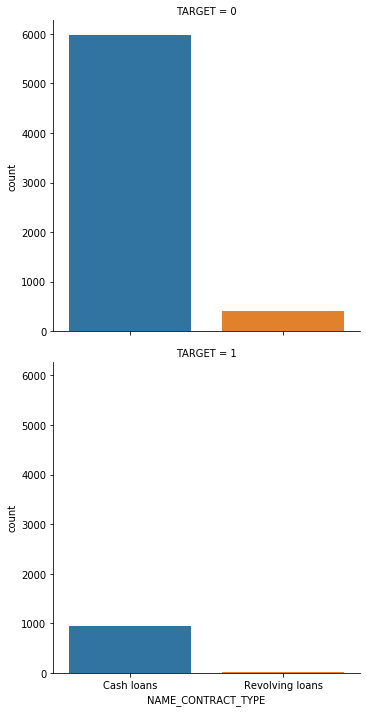

In [74]:
#Revolving loans are less compared to cash loans
sns.factorplot(x = "NAME_CONTRACT_TYPE", row = "TARGET", data = app_df, kind = "count")

In [75]:
# Filter target with 1, which is not repayed
app_not_repaid = app_df.loc[app_df['TARGET'] == 1]
app_repaid = app_df.loc[app_df['TARGET'] == 0]

len(app_not_repaid)/len(app_df) * 100

# before removal 8 , after that  13%

13.054723659134224

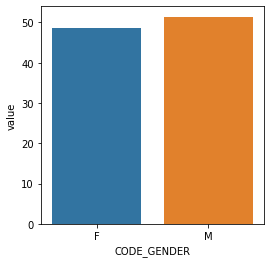

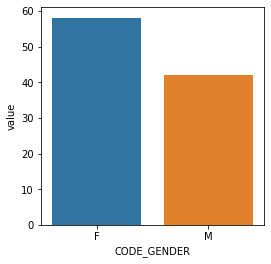

In [76]:
# More male clients are not paying the loan 

percent_plot(app_not_repaid,'CODE_GENDER')
percent_plot(app_repaid,'CODE_GENDER')

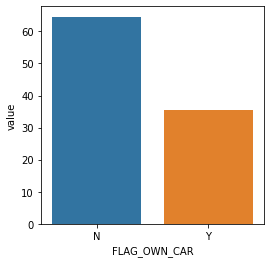

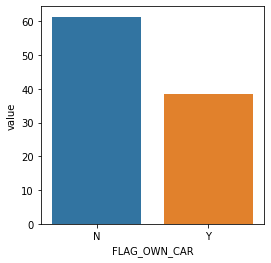

In [77]:
# client who defaulted on loan , dont own cars( 69%)
percent_plot(app_not_repaid,'FLAG_OWN_CAR')
percent_plot(app_repaid,'FLAG_OWN_CAR')

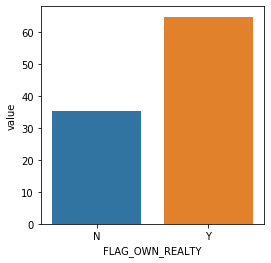

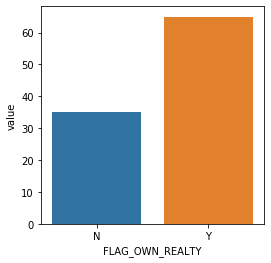

In [78]:
#Own realestate for clients defaulted

# client who defaulted on loan ,own real estate 65+%
percent_plot(app_not_repaid,'FLAG_OWN_REALTY')
percent_plot(app_repaid,'FLAG_OWN_REALTY')

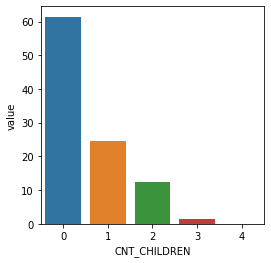

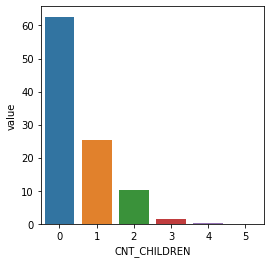

In [79]:
# Most of the them have not childern( 65%)
percent_plot(app_not_repaid,'CNT_CHILDREN')
percent_plot(app_repaid,'CNT_CHILDREN')

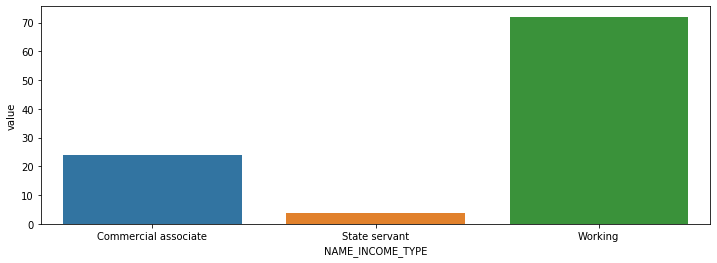

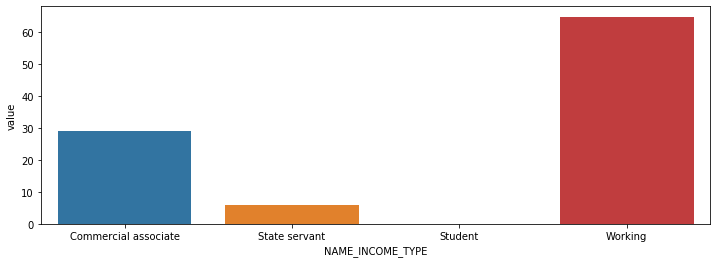

In [80]:
#Most of default are working people 70 %
percent_plot(app_not_repaid,'NAME_INCOME_TYPE',12,4)
percent_plot(app_repaid,'NAME_INCOME_TYPE',12,4)

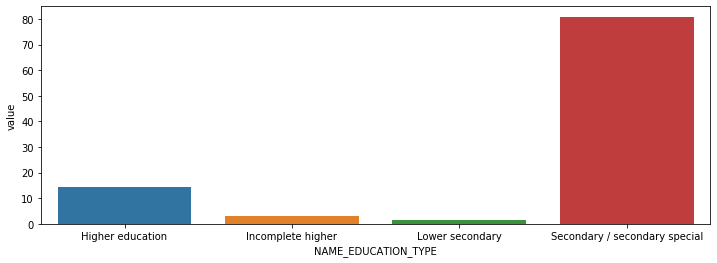

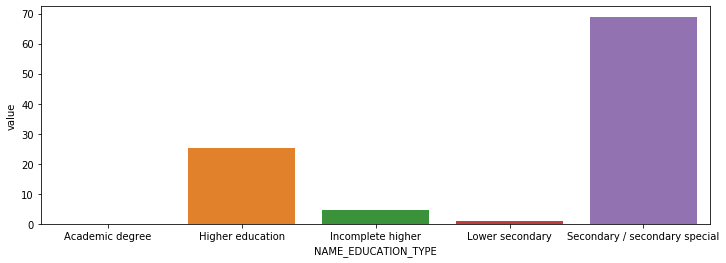

In [81]:
#Most defaults are from customers with Secondary education
percent_plot(app_not_repaid,'NAME_EDUCATION_TYPE',12,4)
percent_plot(app_repaid,'NAME_EDUCATION_TYPE',12,4)

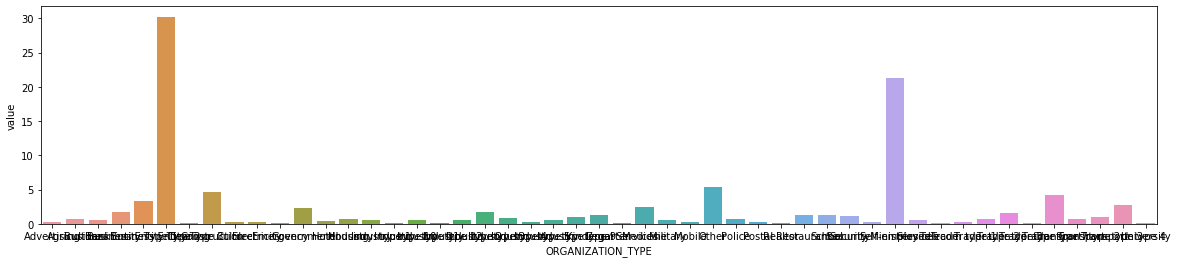

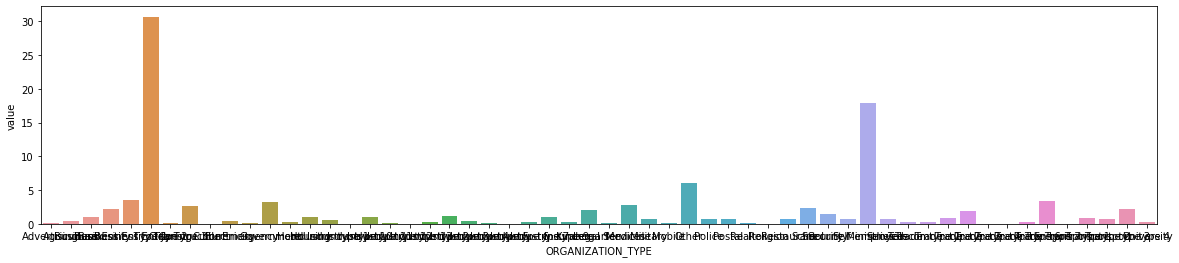

In [82]:
percent_plot(app_not_repaid,'ORGANIZATION_TYPE',20,4)
percent_plot(app_repaid,'ORGANIZATION_TYPE',20,4)

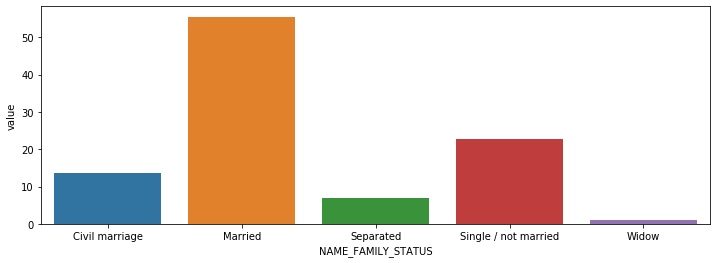

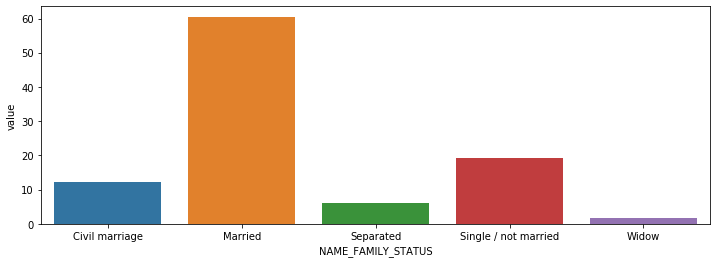

In [83]:
#Most of the defaults from married customers
percent_plot(app_not_repaid,'NAME_FAMILY_STATUS',12,4)
percent_plot(app_repaid,'NAME_FAMILY_STATUS',12,4)

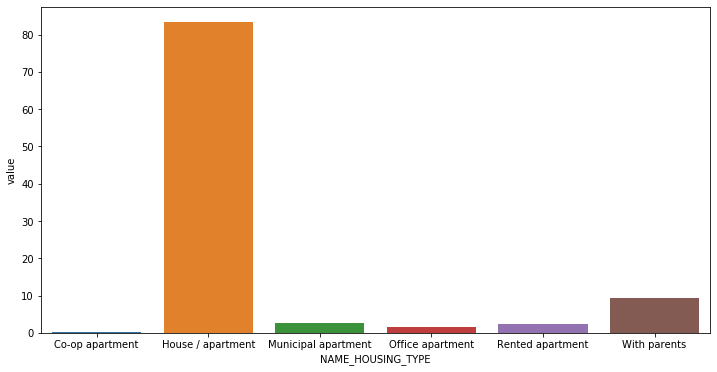

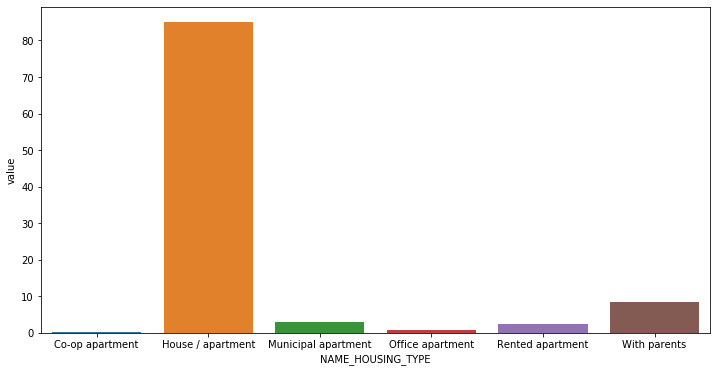

In [84]:
# Most of them have house or apartment
percent_plot(app_not_repaid,'NAME_HOUSING_TYPE',12,6)
percent_plot(app_repaid,'NAME_HOUSING_TYPE',12,6)

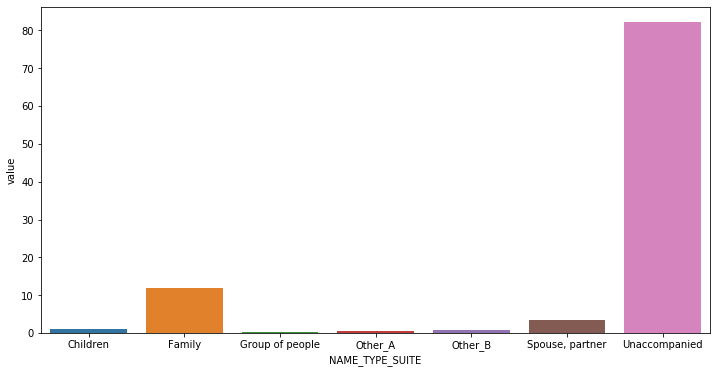

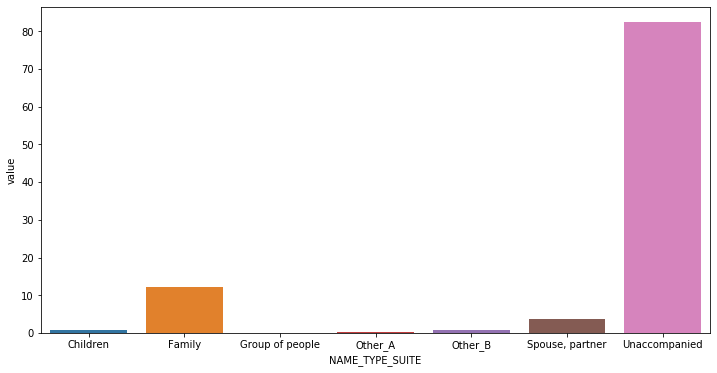

In [85]:
#Most of them is unaccompanied 
percent_plot(app_not_repaid,'NAME_TYPE_SUITE',12,6)
percent_plot(app_repaid,'NAME_TYPE_SUITE',12,6)


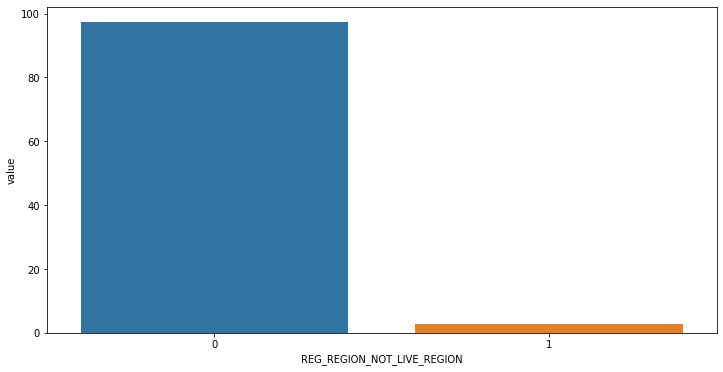

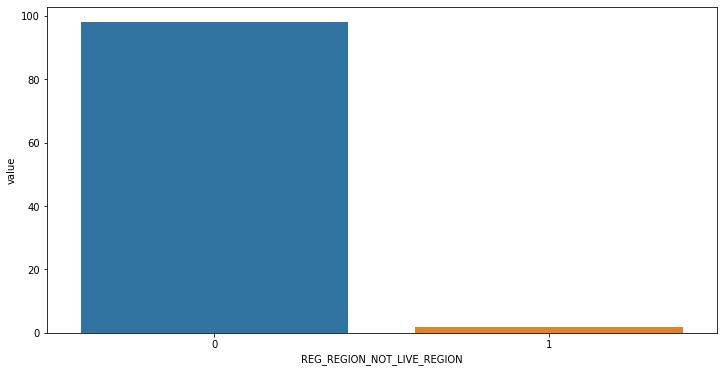

In [86]:
# Most of them current address  match permanent address
percent_plot(app_not_repaid,'REG_REGION_NOT_LIVE_REGION',12,6)
percent_plot(app_repaid,'REG_REGION_NOT_LIVE_REGION',12,6)


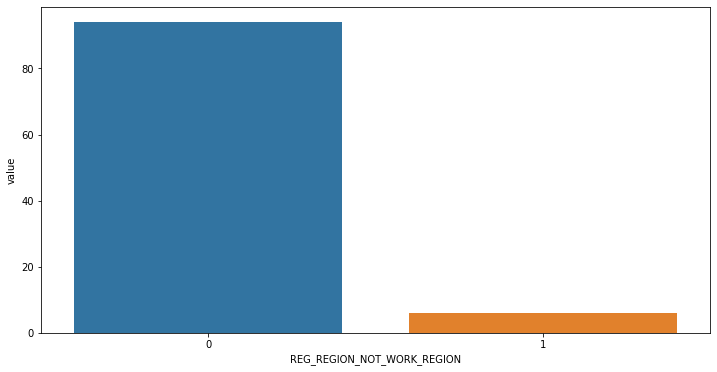

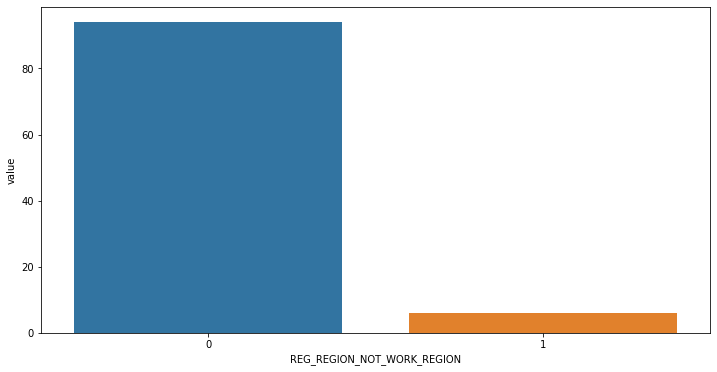

In [29]:
# Most of them work address  match permanent address

percent_plot(app_not_repaid,'REG_REGION_NOT_WORK_REGION',12,6)
percent_plot(app_repaid,'REG_REGION_NOT_WORK_REGION',12,6)


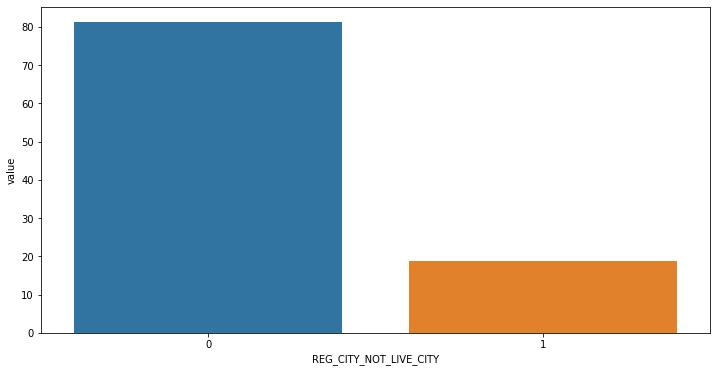

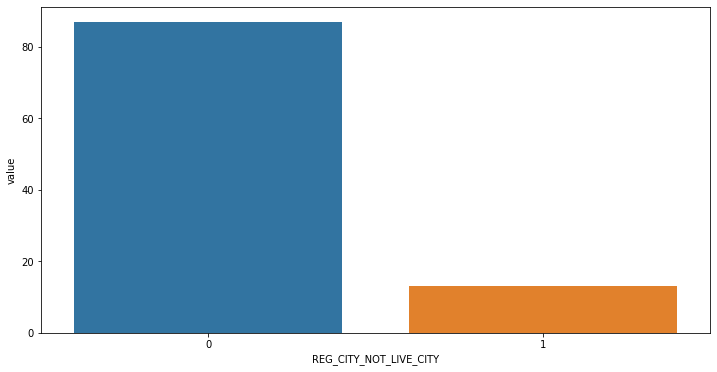

In [30]:
# Most of them current address  match permanent address

percent_plot(app_not_repaid,'REG_CITY_NOT_LIVE_CITY',12,6)
percent_plot(app_repaid,'REG_CITY_NOT_LIVE_CITY',12,6)


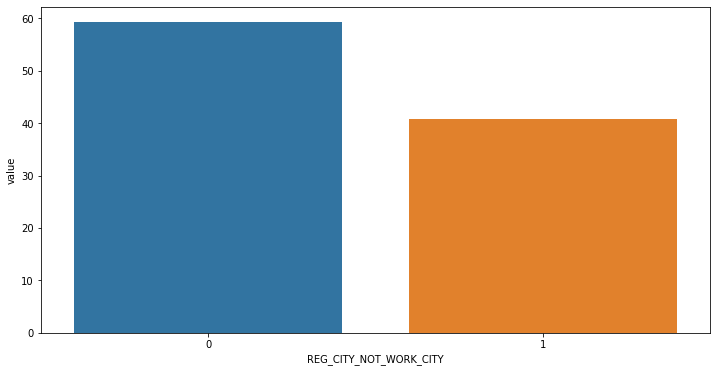

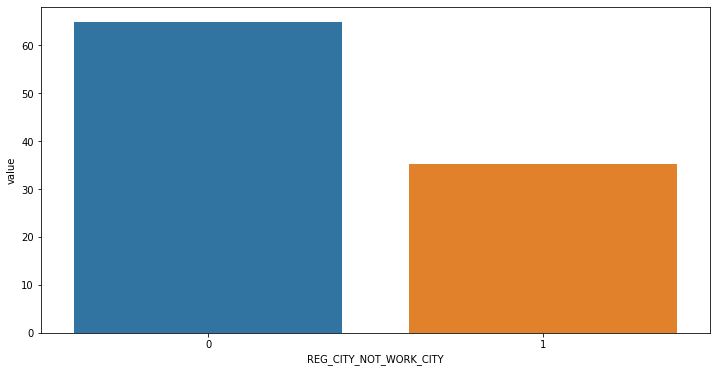

In [87]:
# Most of them work address  match permanent address

percent_plot(app_not_repaid,'REG_CITY_NOT_WORK_CITY',12,6)
percent_plot(app_repaid,'REG_CITY_NOT_WORK_CITY',12,6)


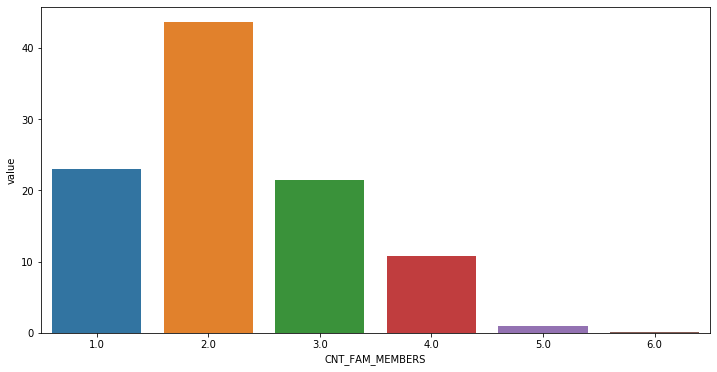

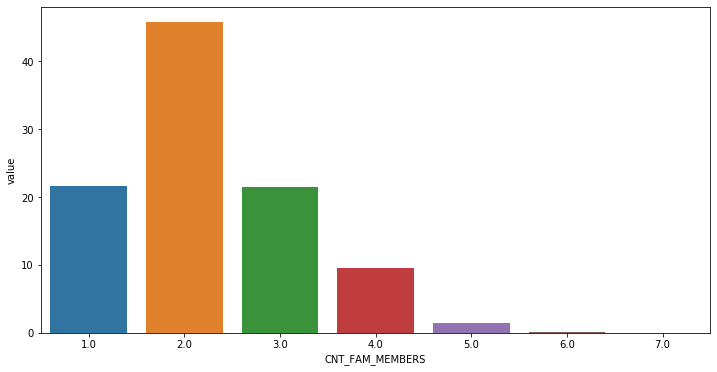

In [88]:
#Most of the have 2 family members
percent_plot(app_not_repaid,'CNT_FAM_MEMBERS',12,6)
percent_plot(app_repaid,'CNT_FAM_MEMBERS',12,6)



/Users/tavant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/tavant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/tavant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

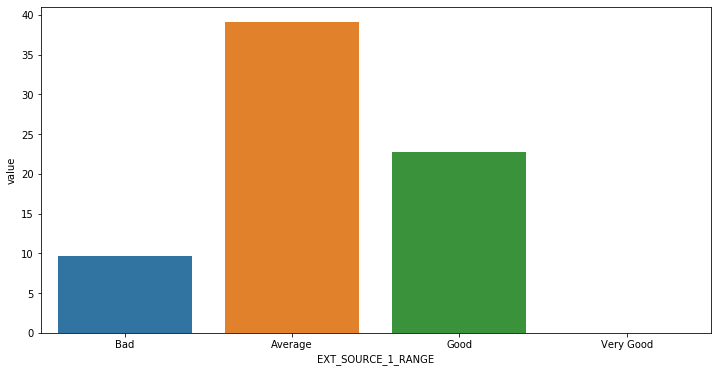

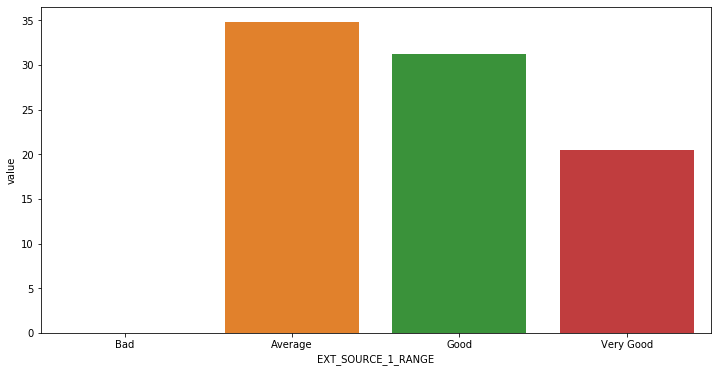

In [114]:
app_not_repaid["EXT_SOURCE_1"] = pd.to_numeric(app_not_repaid["EXT_SOURCE_1"])
app_repaid["EXT_SOURCE_1"] = pd.to_numeric(app_repaid["EXT_SOURCE_1"])

bins = [0.0, 0.2, 0.4, 0.6, 0.8]
slot = ['Bad', 'Average', 'Good', 'Very Good']
app_not_repaid['EXT_SOURCE_1_RANGE'] = pd.cut(app_not_repaid['EXT_SOURCE_1'], bins, labels=slot)


bins = [0.0, 0.2, 0.4, 0.6, 0.8]
slot = ['Bad', 'Average', 'Good', 'Very Good']
app_repaid['EXT_SOURCE_1_RANGE'] = pd.cut(app_repaid['EXT_SOURCE_1'], bins, labels=slot)

percent_plot(app_not_repaid,'EXT_SOURCE_1_RANGE',12,6)
percent_plot(app_repaid,'EXT_SOURCE_1_RANGE',12,6)


/Users/tavant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/tavant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


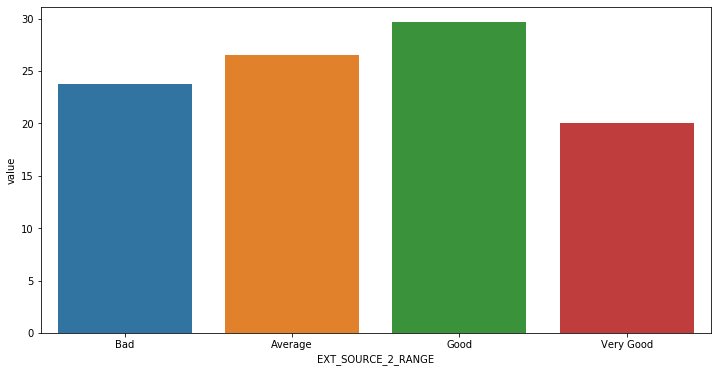

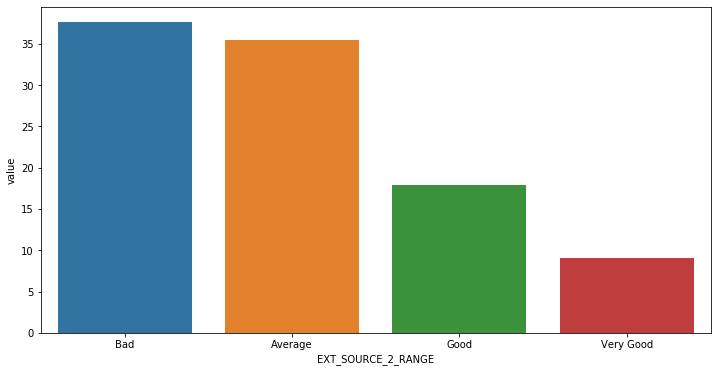

In [89]:
#Most of the have 2 family members

bins = [0.0, 0.2, 0.4, 0.6, 0.8]
slot = ['Bad', 'Average', 'Good', 'Very Good']
app_not_repaid['EXT_SOURCE_2_RANGE'] = pd.cut(app_not_repaid['EXT_SOURCE_2'], bins, labels=slot)


bins = [0.0, 0.2, 0.4, 0.6, 0.8]
slot = ['Bad', 'Average', 'Good', 'Very Good']
app_repaid['EXT_SOURCE_2_RANGE'] = pd.cut(app_repaid['EXT_SOURCE_2'], bins, labels=slot)

percent_plot(app_not_repaid,'EXT_SOURCE_2_RANGE',12,6)
percent_plot(app_repaid,'EXT_SOURCE_2_RANGE',12,6)


/Users/tavant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/tavant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


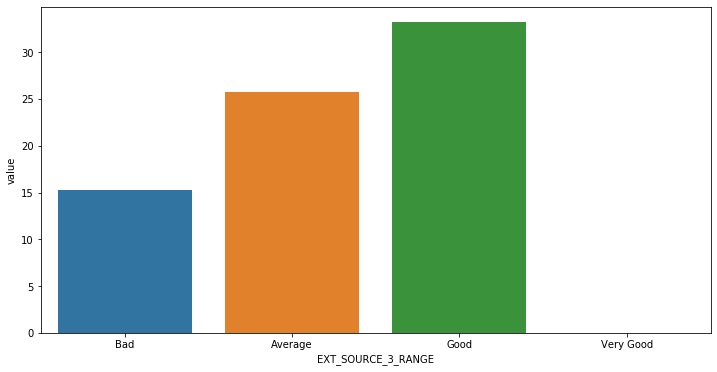

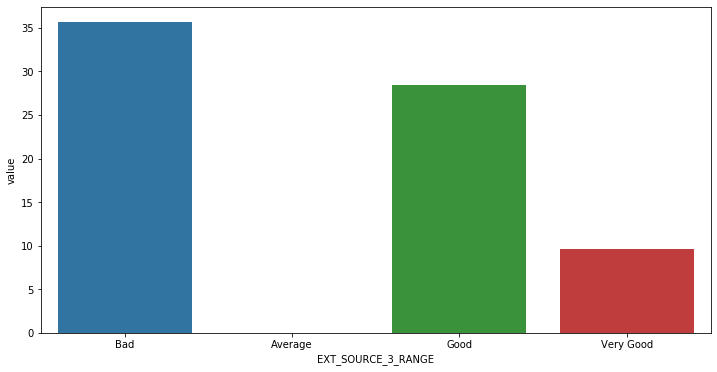

In [90]:
#Most of the have 2 family members

bins = [0.0, 0.2, 0.4, 0.6, 0.8]
slot = ['Bad', 'Average', 'Good', 'Very Good']
app_not_repaid['EXT_SOURCE_3_RANGE'] = pd.cut(app_not_repaid['EXT_SOURCE_3'], bins, labels=slot)


bins = [0.0, 0.2, 0.4, 0.6, 0.8]
slot = ['Bad', 'Average', 'Good', 'Very Good']
app_repaid['EXT_SOURCE_3_RANGE'] = pd.cut(app_repaid['EXT_SOURCE_3'], bins, labels=slot)

percent_plot(app_not_repaid,'EXT_SOURCE_3_RANGE',12,6)
percent_plot(app_repaid,'EXT_SOURCE_3_RANGE',12,6)


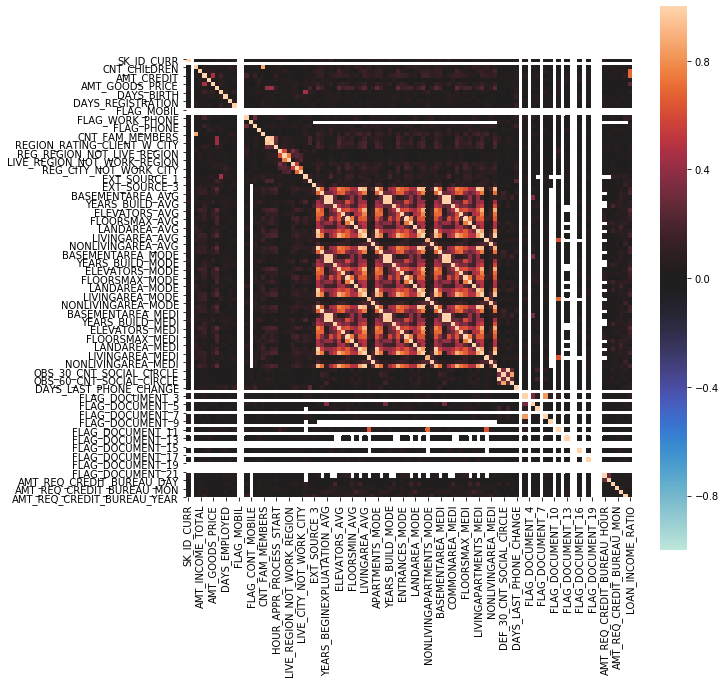

In [91]:
# Check the correlation between attributes
corr = app_not_repaid.corr().abs()
plt.figure(figsize=(10, 10))

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    square=True
)


In [92]:
# Select upper triangle of correlation matrix
app_not_repaid.corr().unstack().sort_values().drop_duplicates()


FLAG_DOCUMENT_8               FLAG_DOCUMENT_3                -0.832215
LOAN_INCOME_RATIO             AMT_INCOME_TOTAL               -0.689237
EXT_SOURCE_1                  DAYS_BIRTH                     -0.437939
REGION_POPULATION_RELATIVE    REGION_RATING_CLIENT_W_CITY    -0.426157
                              REGION_RATING_CLIENT           -0.412283
FLAG_DOCUMENT_5               YEARS_BEGINEXPLUATATION_AVG    -0.363591
YEARS_BEGINEXPLUATATION_MEDI  FLAG_DOCUMENT_5                -0.328003
YEARS_BEGINEXPLUATATION_MODE  FLAG_DOCUMENT_5                -0.327888
FLAG_DOCUMENT_3               FLAG_DOCUMENT_5                -0.317714
HOUR_APPR_PROCESS_START       REGION_RATING_CLIENT           -0.290479
REGION_RATING_CLIENT_W_CITY   HOUR_APPR_PROCESS_START        -0.258581
DAYS_LAST_PHONE_CHANGE        EXT_SOURCE_2                   -0.246219
LOAN_INCOME_RATIO             ELEVATORS_AVG                  -0.231547
                              ELEVATORS_MODE                 -0.230887
ELEVAT

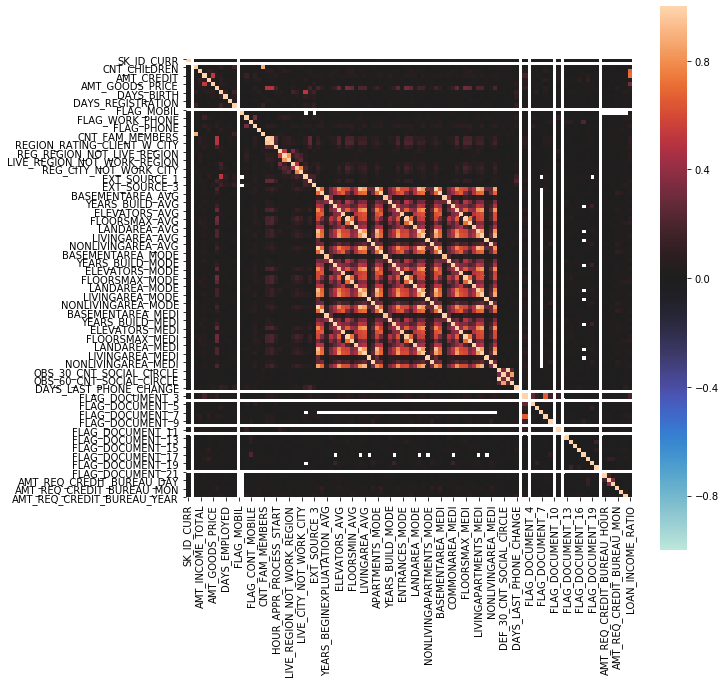

In [93]:
corr = app_repaid.corr().abs()
plt.figure(figsize=(10, 10))

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    square=True
)

In [94]:
app_repaid.corr().unstack().sort_values().drop_duplicates()


LOAN_INCOME_RATIO             AMT_INCOME_TOTAL              -0.682959
FLAG_DOCUMENT_3               FLAG_DOCUMENT_8               -0.662335
EXT_SOURCE_1                  DAYS_BIRTH                    -0.505653
REGION_RATING_CLIENT_W_CITY   REGION_POPULATION_RELATIVE    -0.490732
REGION_RATING_CLIENT          REGION_POPULATION_RELATIVE    -0.489351
REGION_RATING_CLIENT_W_CITY   EXT_SOURCE_2                  -0.261280
FLAG_DOCUMENT_5               FLAG_DOCUMENT_3               -0.257733
REGION_RATING_CLIENT          EXT_SOURCE_2                  -0.257524
HOUR_APPR_PROCESS_START       REGION_RATING_CLIENT          -0.247513
REGION_RATING_CLIENT_W_CITY   HOUR_APPR_PROCESS_START       -0.225990
FLAG_CONT_MOBILE              FLAG_DOCUMENT_17              -0.217671
REGION_RATING_CLIENT_W_CITY   ELEVATORS_AVG                 -0.216297
FLOORSMAX_AVG                 REGION_RATING_CLIENT_W_CITY   -0.214801
FLOORSMIN_AVG                 REGION_RATING_CLIENT_W_CITY   -0.211832
FLOORSMIN_MEDI      

/Users/tavant/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


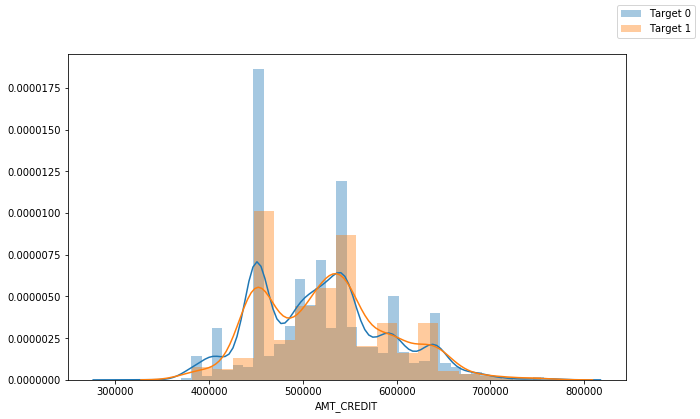

In [95]:
# See the distribution of credit
def dist_plot(feature1,feature2):
    fig = plt.figure(figsize=(10,6))
    sns.distplot(feature1)
    sns.distplot(feature2)
    fig.legend(labels=['Target 0','Target 1'])
    plt.show()

dist_plot(app_repaid['AMT_CREDIT'],app_not_repaid['AMT_CREDIT'])


/Users/tavant/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


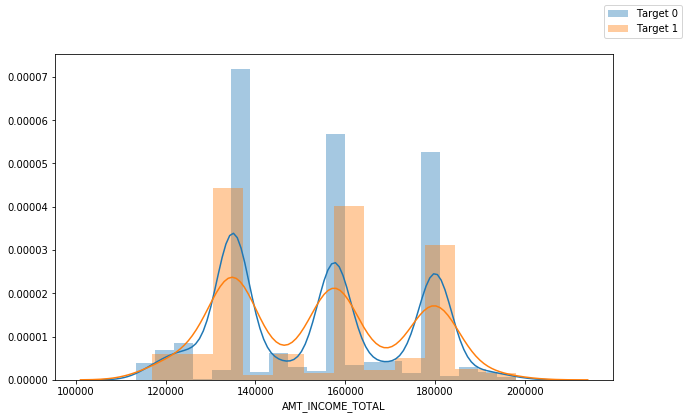

In [96]:
#See the distrubition of income

dist_plot(app_repaid['AMT_INCOME_TOTAL'],app_not_repaid['AMT_INCOME_TOTAL'])

/Users/tavant/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


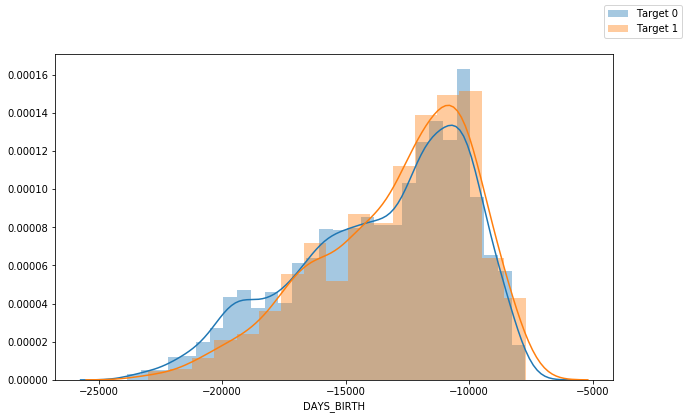

In [97]:
#see the distribution of day of Birth

dist_plot(app_repaid['DAYS_BIRTH'],app_not_repaid['DAYS_BIRTH'])

/Users/tavant/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


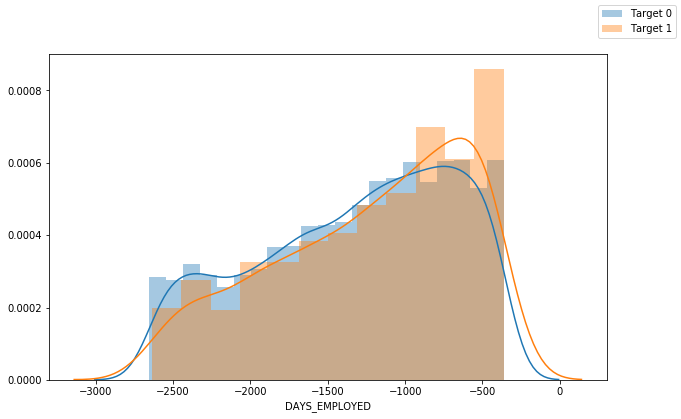

In [98]:
#see the distribution of day of Employed

dist_plot(app_repaid['DAYS_EMPLOYED'],app_not_repaid['DAYS_EMPLOYED'])


/Users/tavant/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


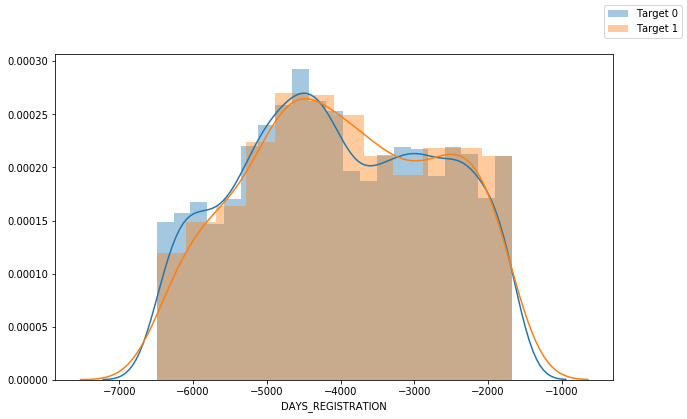

In [99]:
#see the distribution of day of Registered

dist_plot(app_repaid['DAYS_REGISTRATION'],app_not_repaid['DAYS_REGISTRATION'])


In [100]:
#previous application
# 1-A
# Read csv file into a pandas dataframe
prev_df = pd.read_csv("loan/previous_application.csv")

#(1670214, 37)
prev_df.shape




(1670214, 37)

In [101]:
sum(prev_df.duplicated(subset = "SK_ID_PREV")) == 0


True

In [102]:
prev_df = prev_df.replace({'XNA': numpy.NaN})
prev_df = prev_df.replace({'XAP': numpy.NaN})



/Users/tavant/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/tavant/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


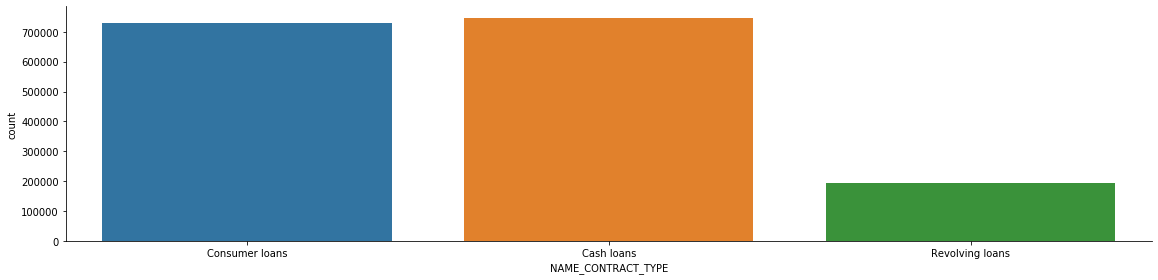

In [103]:
sns.factorplot( x = "NAME_CONTRACT_TYPE", data = prev_df, kind = "count",size=4, aspect=4)

/Users/tavant/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/tavant/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


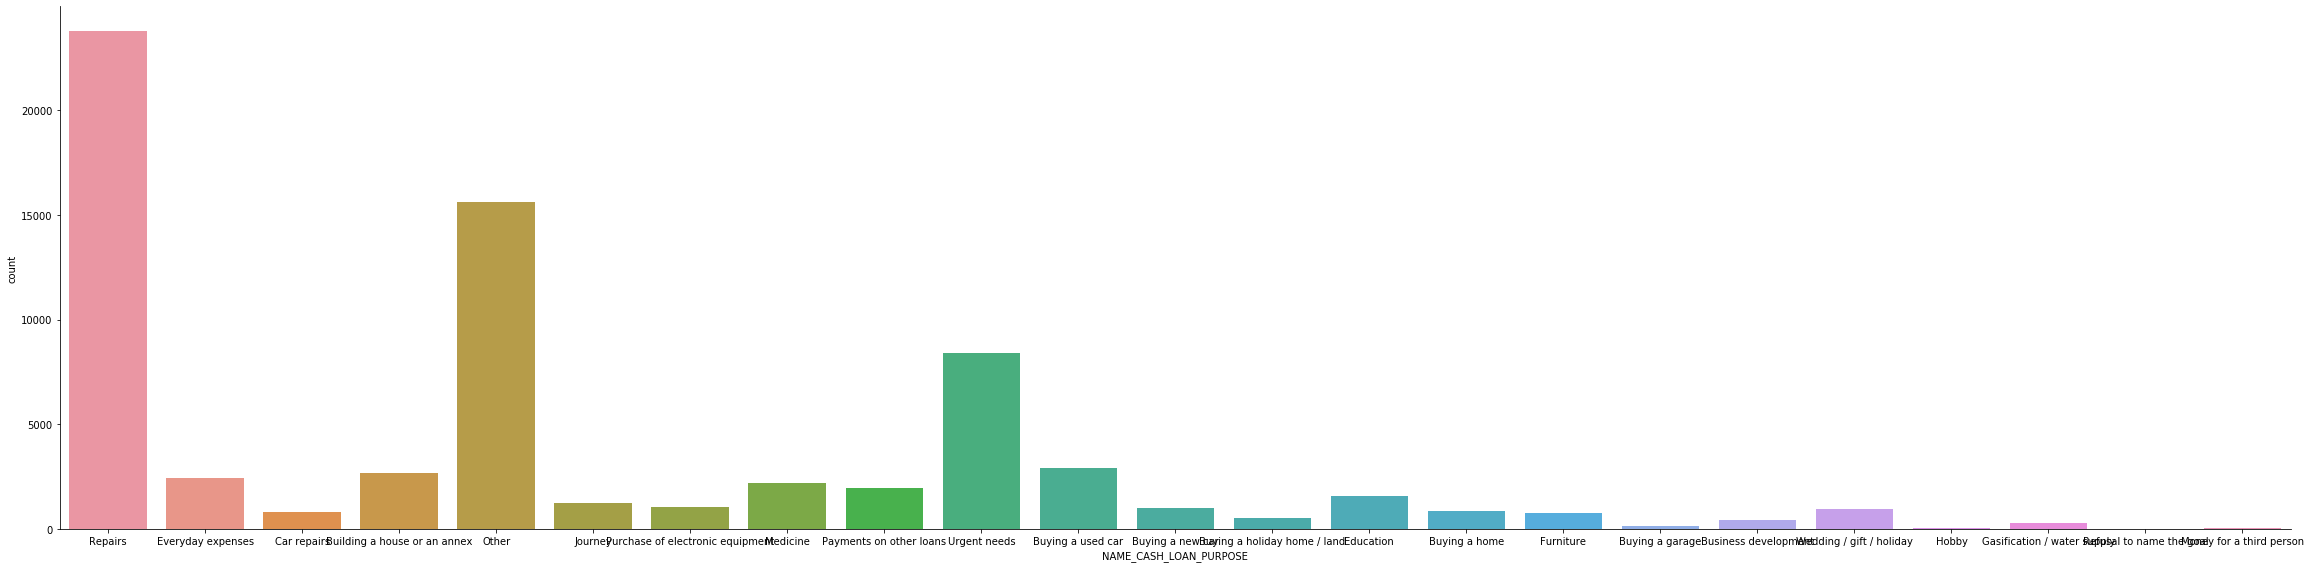

In [104]:
# Most of the them for repairs
sns.factorplot( x = "NAME_CASH_LOAN_PURPOSE", data = prev_df, kind = "count",size=8, aspect=4)


/Users/tavant/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/tavant/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


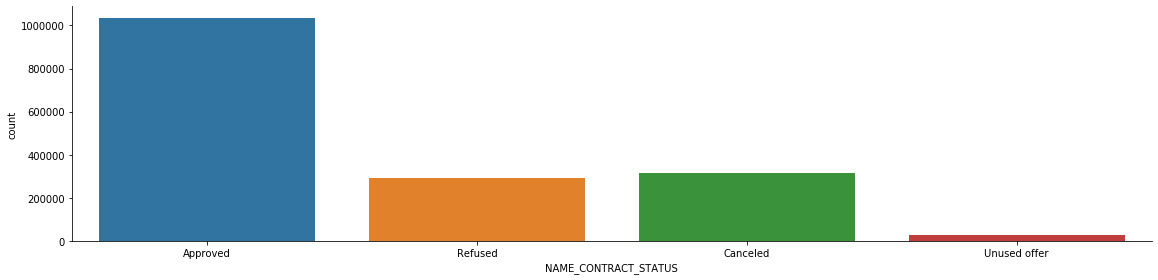

In [105]:
#Most of the loan are approved
sns.factorplot( x = "NAME_CONTRACT_STATUS", data = prev_df, kind = "count",size=4, aspect=4)



/Users/tavant/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/tavant/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


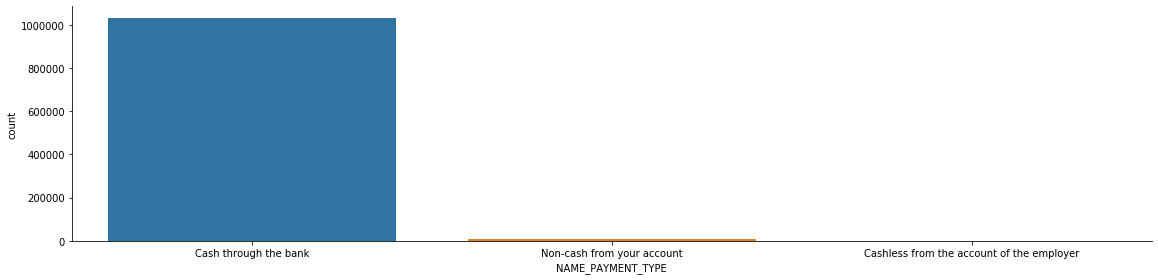

In [118]:
#Payment is mainly through bank
sns.factorplot( x = "NAME_PAYMENT_TYPE", data = prev_df, kind = "count",size=4, aspect=4)



/Users/tavant/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/tavant/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


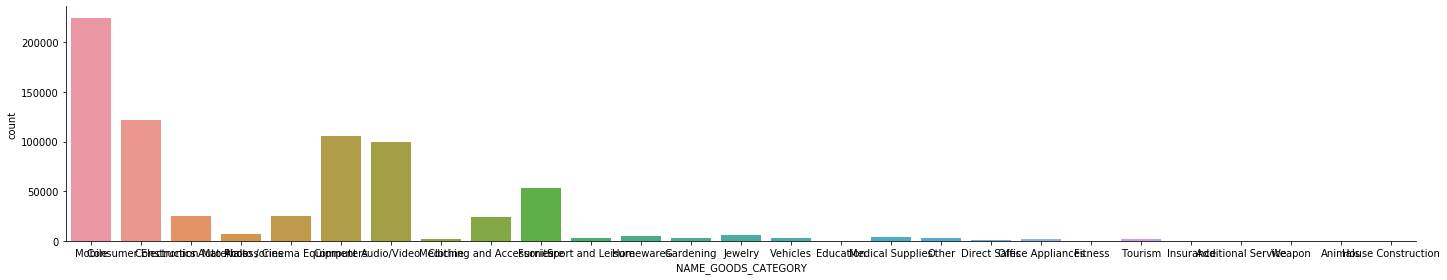

In [120]:
#Mobile  is goods 
sns.factorplot( x = "NAME_GOODS_CATEGORY", data = prev_df, kind = "count",size=4, aspect=5)

/Users/tavant/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


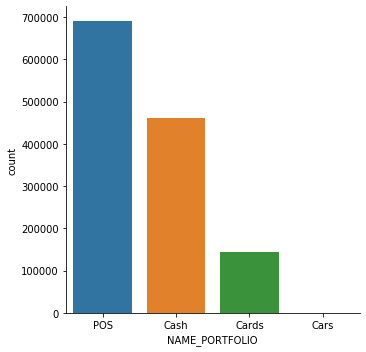

In [121]:
# The previous application was for POS
sns.factorplot( x = "NAME_PORTFOLIO", data = prev_df, kind = "count")



/Users/tavant/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


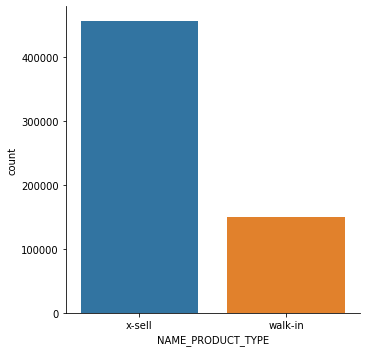

In [122]:
# Most of the them are x-sell
sns.factorplot( x = "NAME_PRODUCT_TYPE", data = prev_df, kind = "count")

/Users/tavant/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/tavant/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


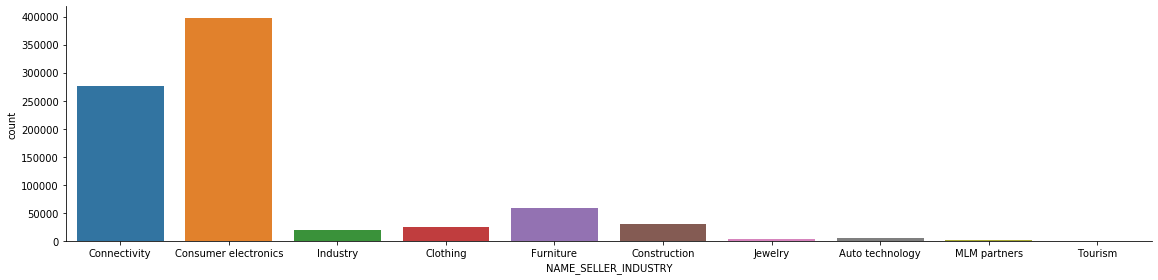

In [123]:
# Consumer Electornics and Connectivity
sns.factorplot( x = "NAME_SELLER_INDUSTRY", data = prev_df, kind = "count",size=4, aspect=4)



/Users/tavant/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/tavant/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


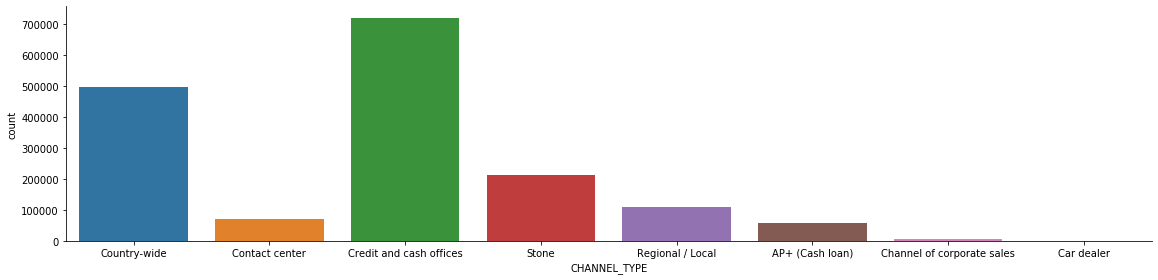

In [124]:
#Credit and Cash offices
sns.factorplot( x = "CHANNEL_TYPE", data = prev_df, kind = "count",size=4, aspect=4)


In [106]:
app_prev = app_df.merge(prev_df, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')
app_prev.shape

(33412, 158)

In [107]:
app_prev = app_prev.replace({'XNA': numpy.NaN})
app_prev = app_prev.replace({'XAP': numpy.NaN})

In [108]:
app_prev_not_repaid = app_prev.loc[app_prev['TARGET'] == 1]
app_prev_repaid = app_prev.loc[app_prev['TARGET'] == 0]

len(app_prev_not_repaid)/len(app_prev) * 100
#percent_plot(app_prev,'NAME_CASH_LOAN_PURPOSE',20,6)


13.174907218963247

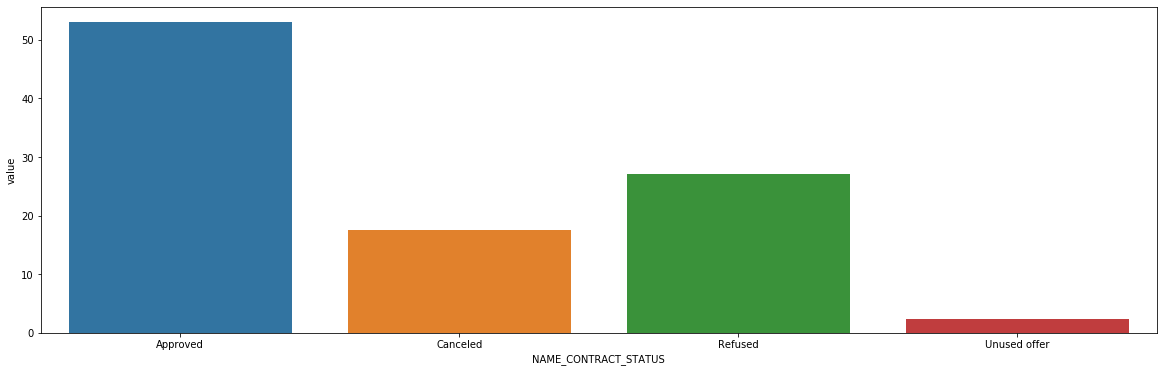

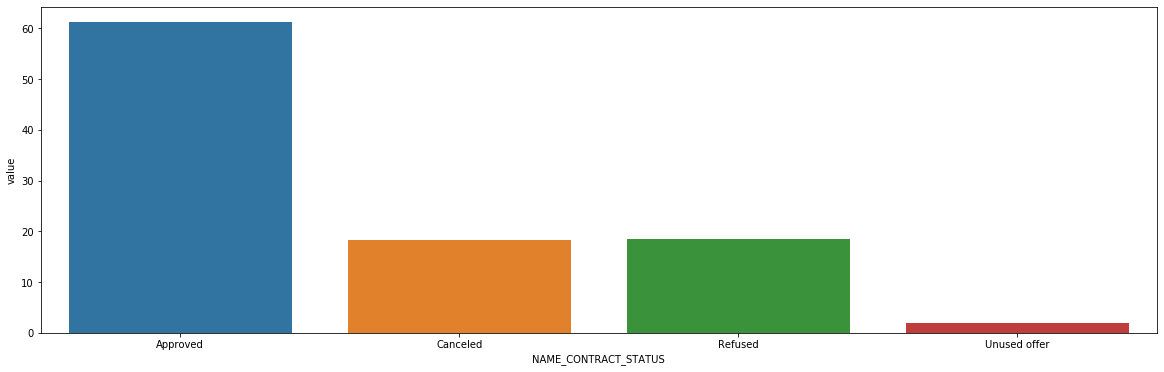

In [109]:
percent_plot(app_prev_not_repaid,'NAME_CONTRACT_STATUS',20,6)
percent_plot(app_prev_repaid,'NAME_CONTRACT_STATUS',20,6)


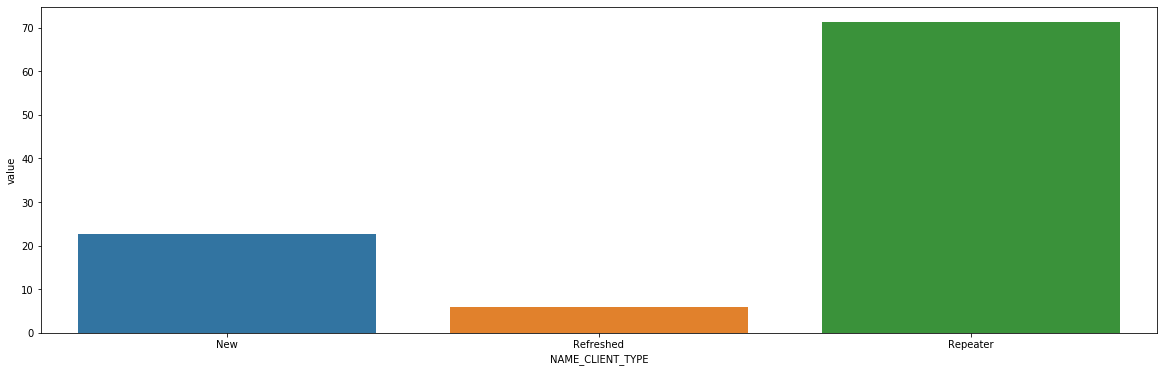

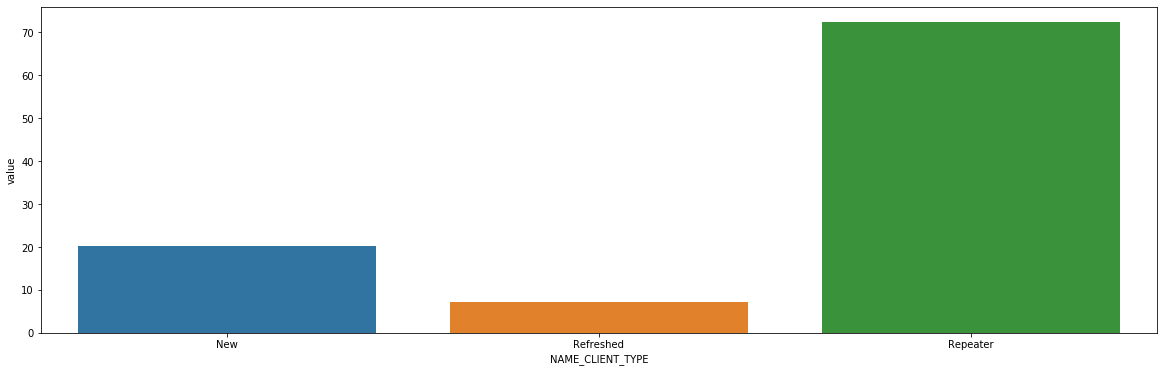

In [59]:
#Repeater
percent_plot(app_prev_not_repaid,'NAME_CLIENT_TYPE',20,6)
percent_plot(app_prev_repaid,'NAME_CLIENT_TYPE',20,6)

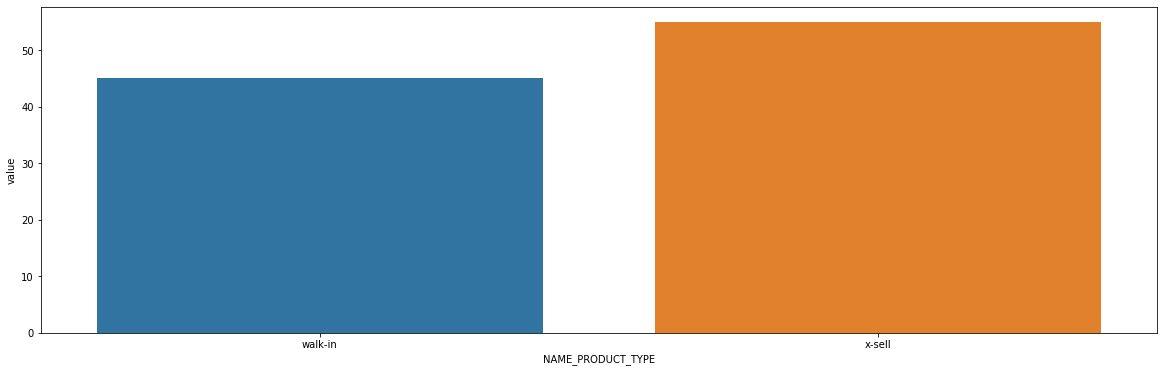

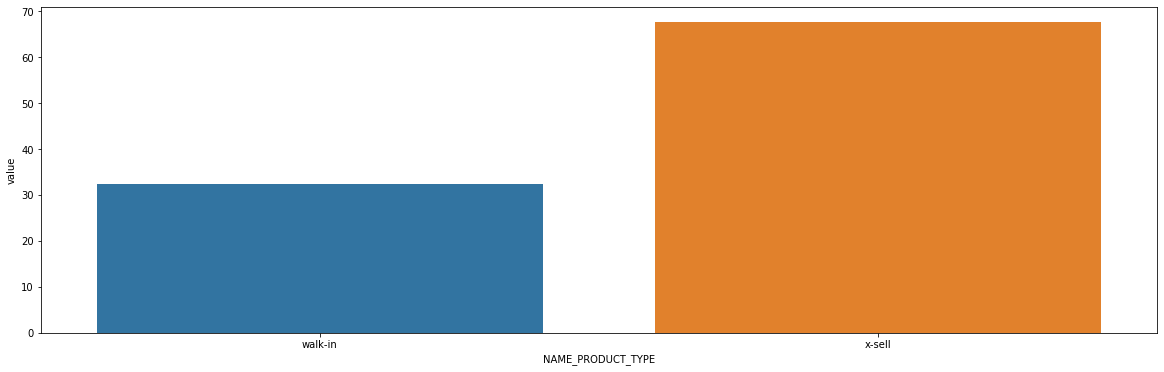

In [110]:
percent_plot(app_prev_not_repaid,'NAME_PRODUCT_TYPE',20,6)
percent_plot(app_prev_repaid,'NAME_PRODUCT_TYPE',20,6)


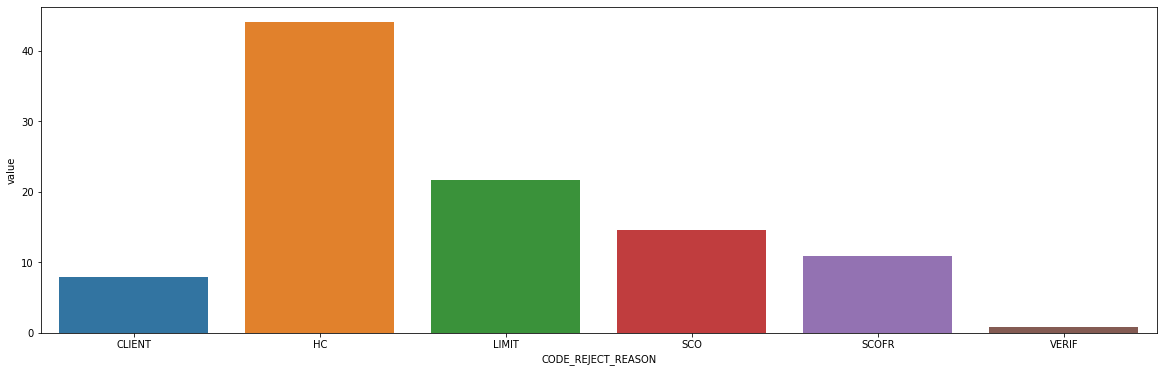

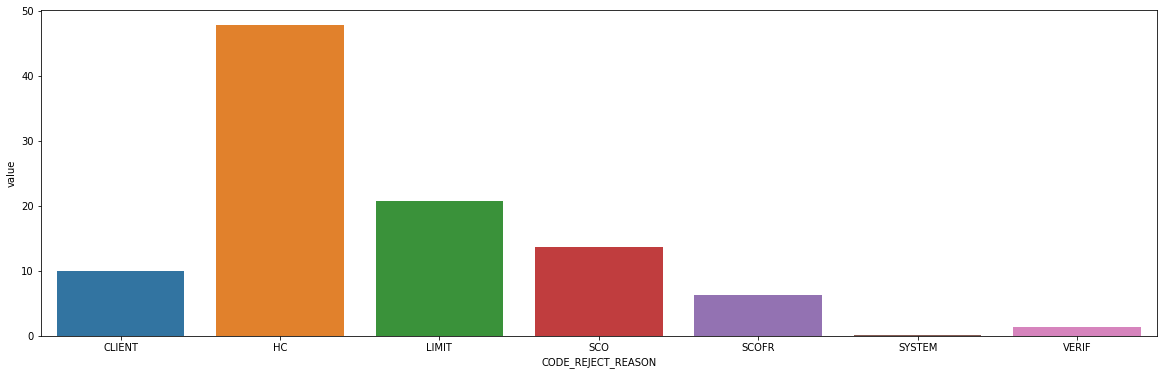

In [116]:
percent_plot(app_prev_not_repaid,'CODE_REJECT_REASON',20,6)
percent_plot(app_prev_repaid,'CODE_REJECT_REASON',20,6)


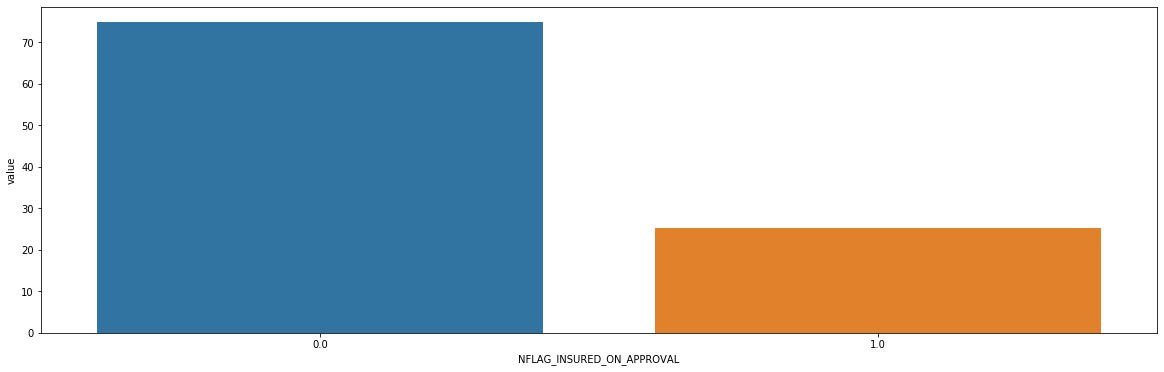

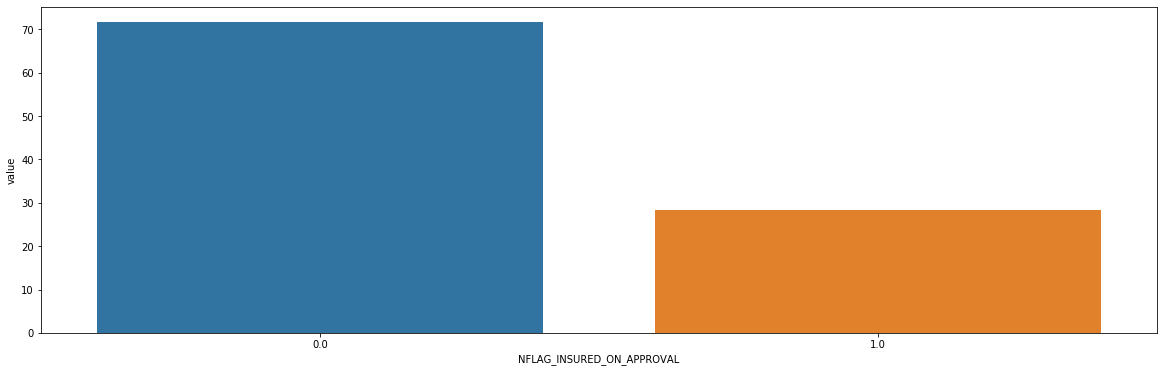

In [117]:
percent_plot(app_prev_not_repaid,'NFLAG_INSURED_ON_APPROVAL',20,6)
percent_plot(app_prev_repaid,'NFLAG_INSURED_ON_APPROVAL',20,6)
